In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [8]:
df = pd.read_csv('customer_data.csv')
df.head()


,CustomerID,Age,Annual_Income,Spending_Score
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [9]:
X = df[['Annual_Income', 'Spending_Score']]
X.head()


,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


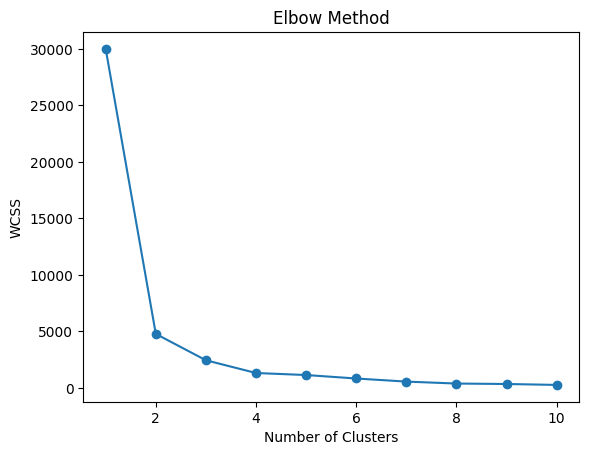

In [10]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [11]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)
df.head()


,CustomerID,Age,Annual_Income,Spending_Score,Cluster
0,1,19,15,39,2
1,2,21,15,81,3
2,3,20,16,6,0
3,4,23,16,77,3
4,5,31,17,40,2


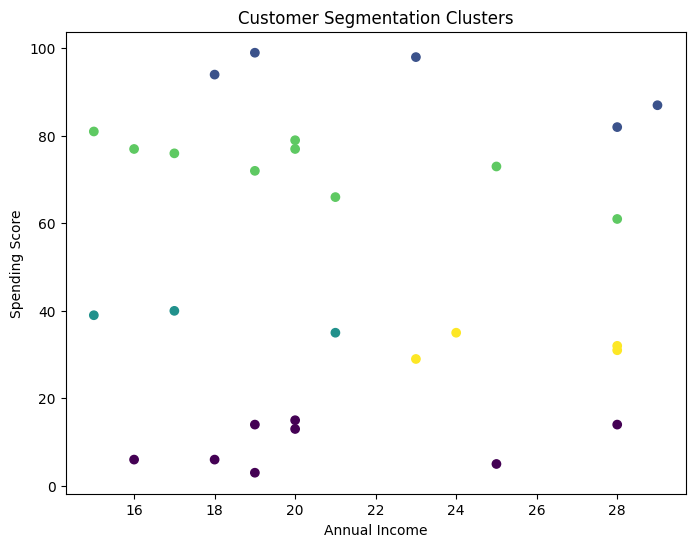

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(df['Annual_Income'], df['Spending_Score'],
            c=df['Cluster'], cmap='viridis')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation Clusters')
plt.show()
